### DLTK ML Classification Tutorial

In [1]:
# If you are running this notebook on GOOGLE COLAB, uncomment below code & run this cell

# !git clone https://github.com/dltk-ai/qubitai-dltk.git
# %cd qubitai-dltk/examples/machine_learning/
# !pip install qubitai-dltk

#### Importing Packages

In [16]:
import dltk_ai
from dltk_ai import data_preprocessing
from dltk_ai.dataset_types import Dataset
from getpass import getpass
import json
import numpy as np

#### Data

The objective of the data is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset

|Feature | Description |
|:-|:-|
|**Pregnancies**| Number of times pregnant|
|**Glucose**| Plasma glucose concentration a 2 hours in an oral glucose tolerance test
|**BloodPressure**| Diastolic blood pressure (mm Hg)
|**SkinThickness**| Triceps skin fold thickness (mm)
|**Insulin**| 2-Hour serum insulin (mu U/ml)
|**BMI**| Body mass index (weight in kg/(height in m)^2)
|**DiabetesPedigreeFunction**| Diabetes pedigree function
|**Age**| Age (years)
|**Outcome**| Class variable (0 or 1) 268 of 768 are 1, the others are 0

In [4]:
# Reading the data
df = data_preprocessing.read_data('../data/csv/diabetes_train.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#### Data Profile


Click on the play button to view all the components of data profile.



In [5]:
data_preprocessing.data_profile(df)

In the above output, please click on the **play button**.

In the **describe** section, you will be able to see the characteristics of all the variables.

> **Target Variable**

> We can see that the target variable has 65% non-diabetic class. Which implies a slight imbalance in the data.

It is importance for us to classify the diabetic class correctly, as the penality of classifying the diabetic to non-diabetic is higher that the non-diabetic to diabetic

We can see the distribution of all variables. Following columns or variables have an invalid zero value:

1. Glucose
2. BloodPressure
3. SkinThickness
4. Insulin
5. BMI

#### Data Preprocessing

##### Imputing Missing Values

Considering the zeros as missing values in the data, it is better to replace zeros with suitable values. 

In [6]:
# imputing missing values using impute_missing_value in dltk
median_data = data_preprocessing.impute_missing_value(df,
                                           ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI'],
                                           imputer="univariate_imputation", 
                                           missing_values=0,
                                           strategy='median')

# Replace the imputed columns in original dataset
for column in list(median_data):
    df[column] = median_data[column]

Lets check the distibution of variables after imputing missing values, along with the correlation of all variables with the target variable.



Imported AutoViz_Class version: 0.0.81. Call using:
    from autoviz.AutoViz_Class import AutoViz_Class
    AV = AutoViz_Class()
    AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=0,
                            lowess=False,chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30)
Note: verbose=0 or 1 generates charts and displays them in your local Jupyter notebook.
      verbose=2 saves plots in your local machine under AutoViz_Plots directory and does not display charts.
Shape of your Data Set: (598, 9)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  6
    Number of Integer-Categorical Columns =  2
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  1
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
  

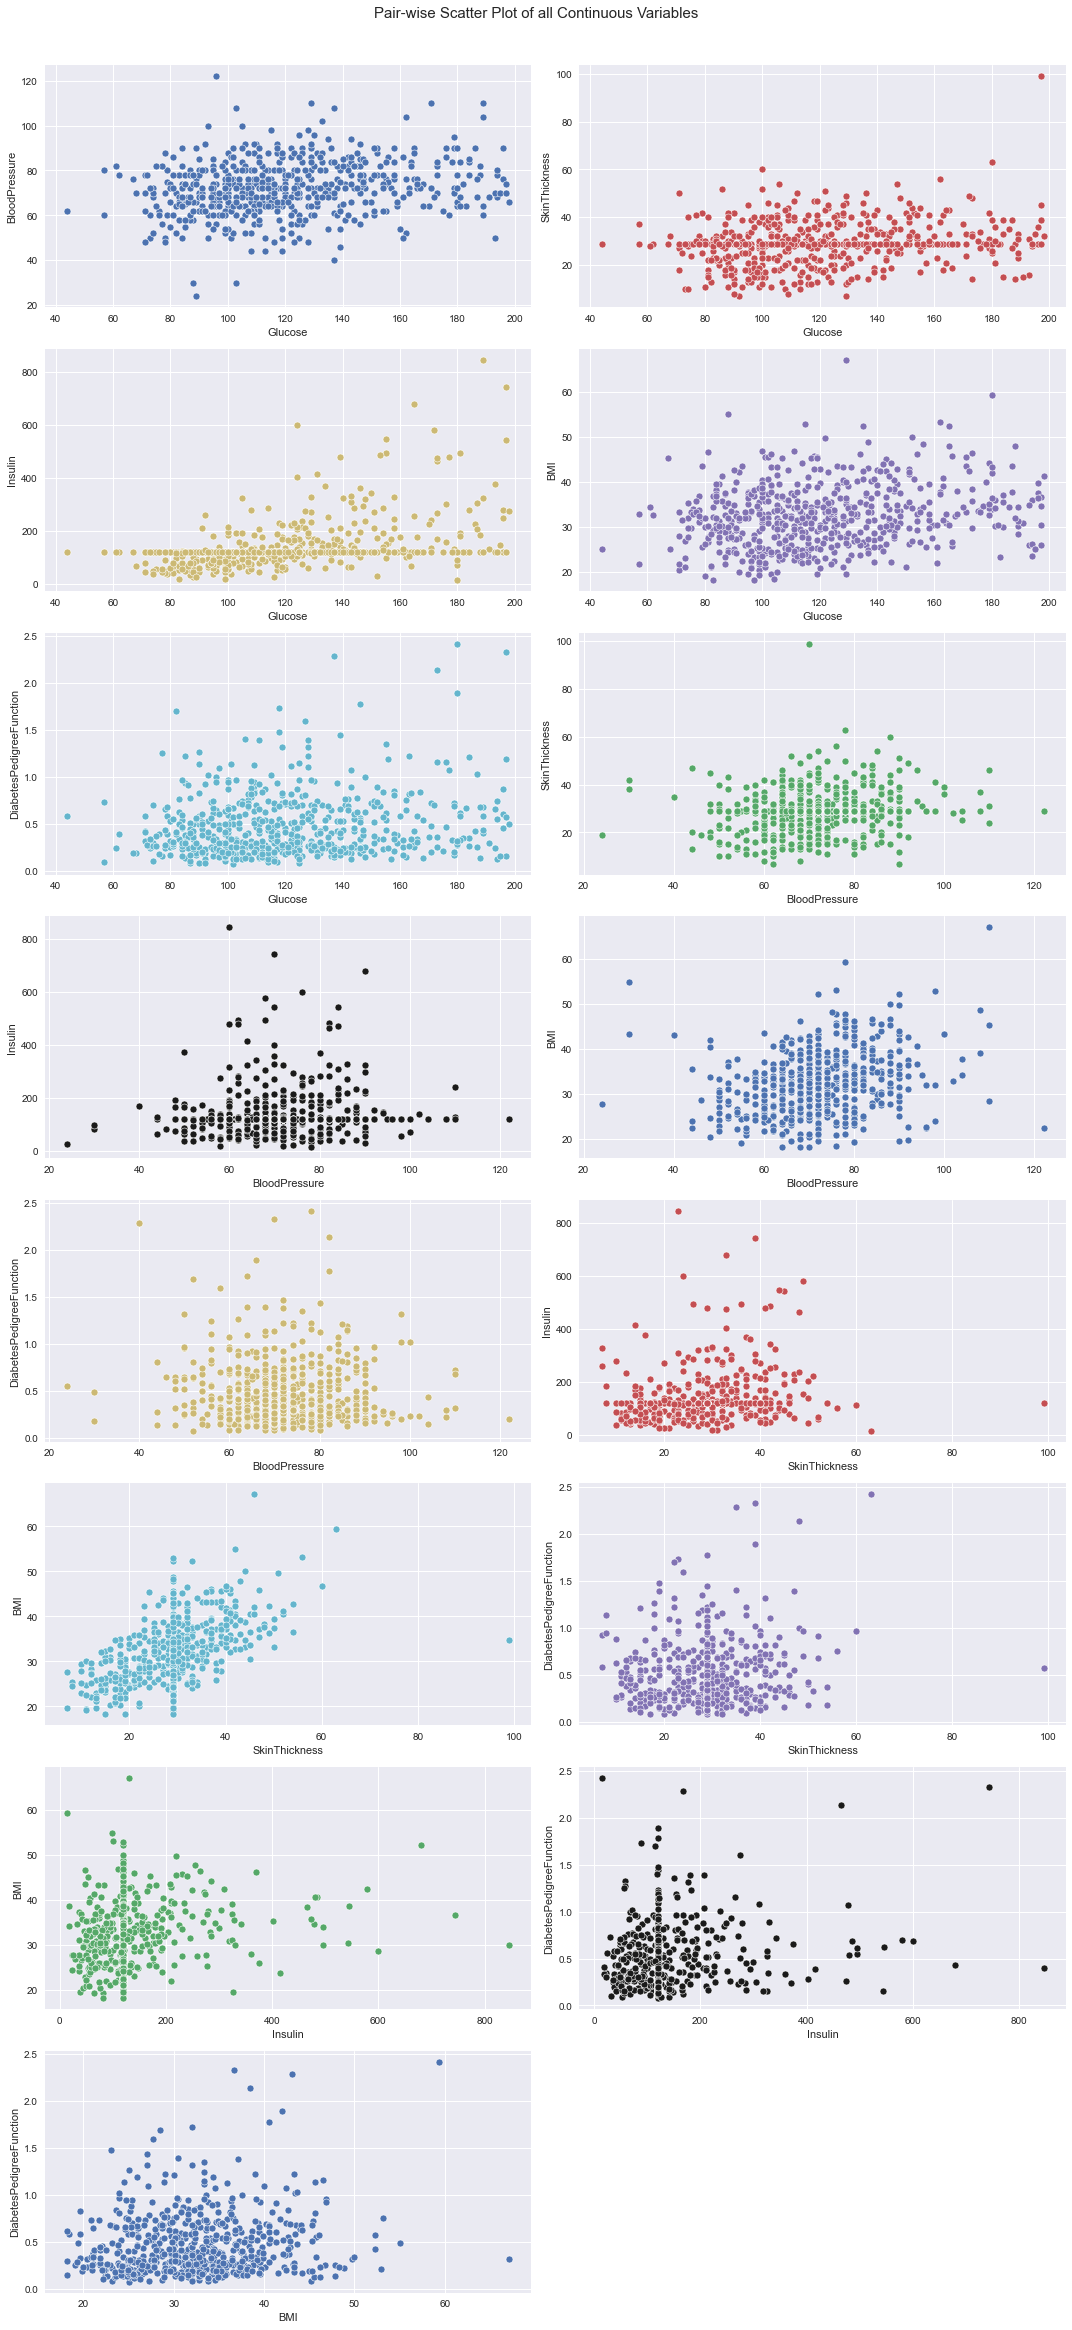

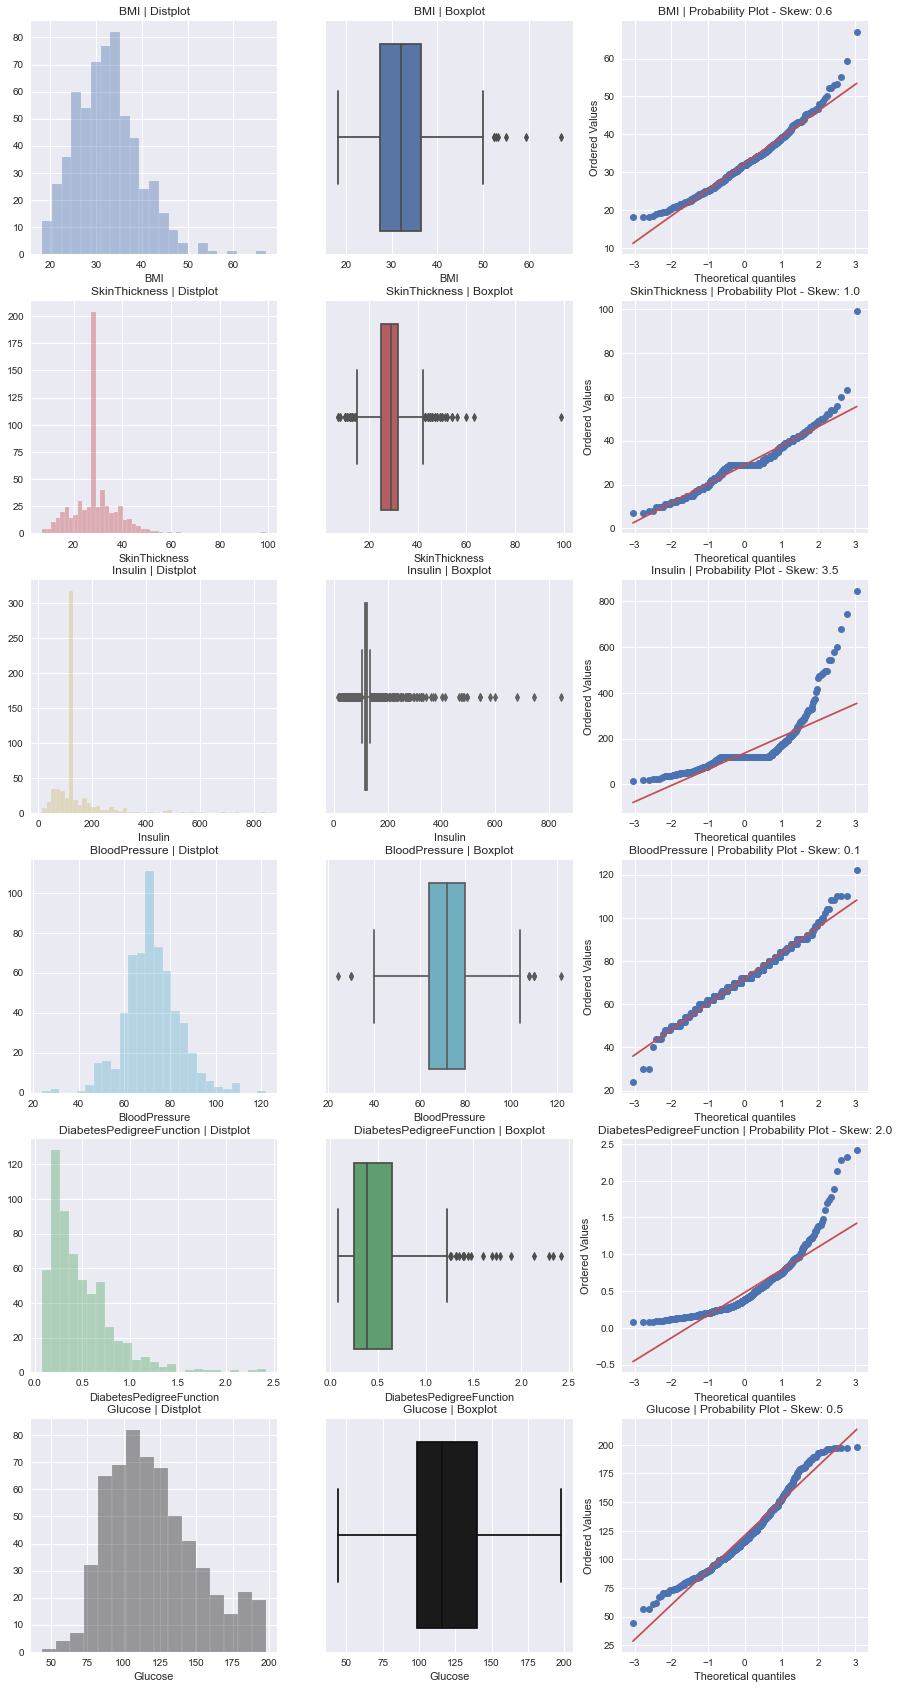

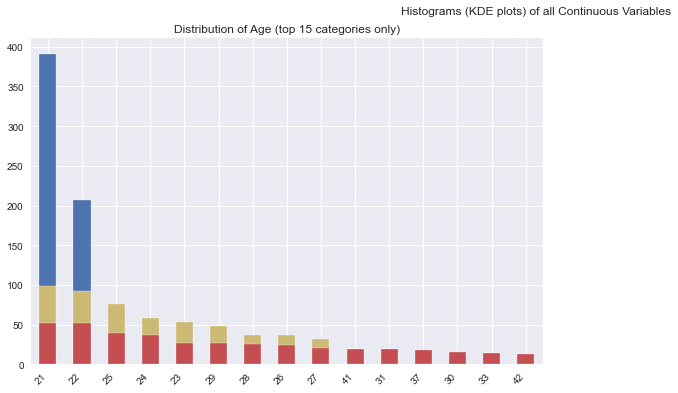

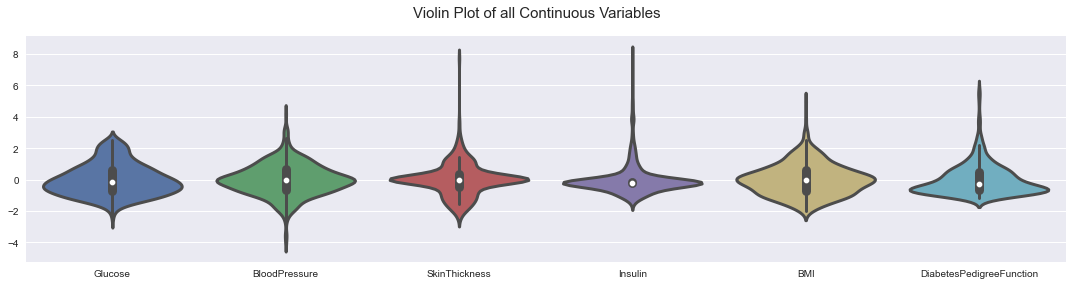

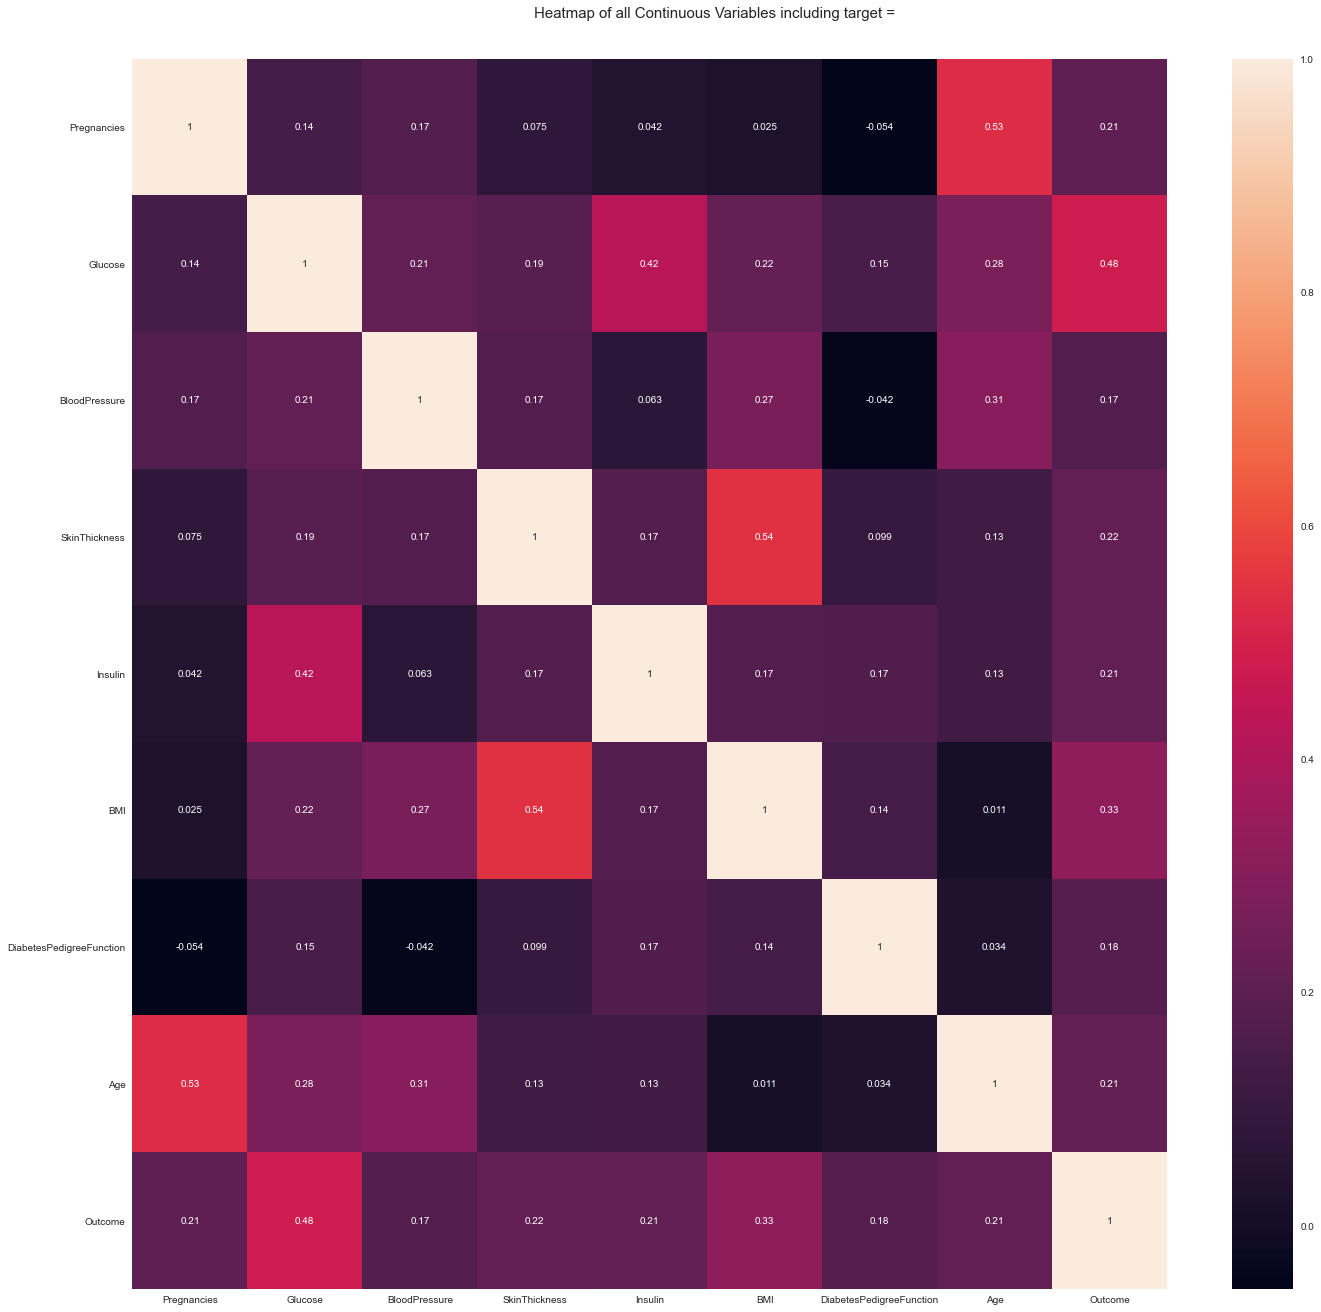

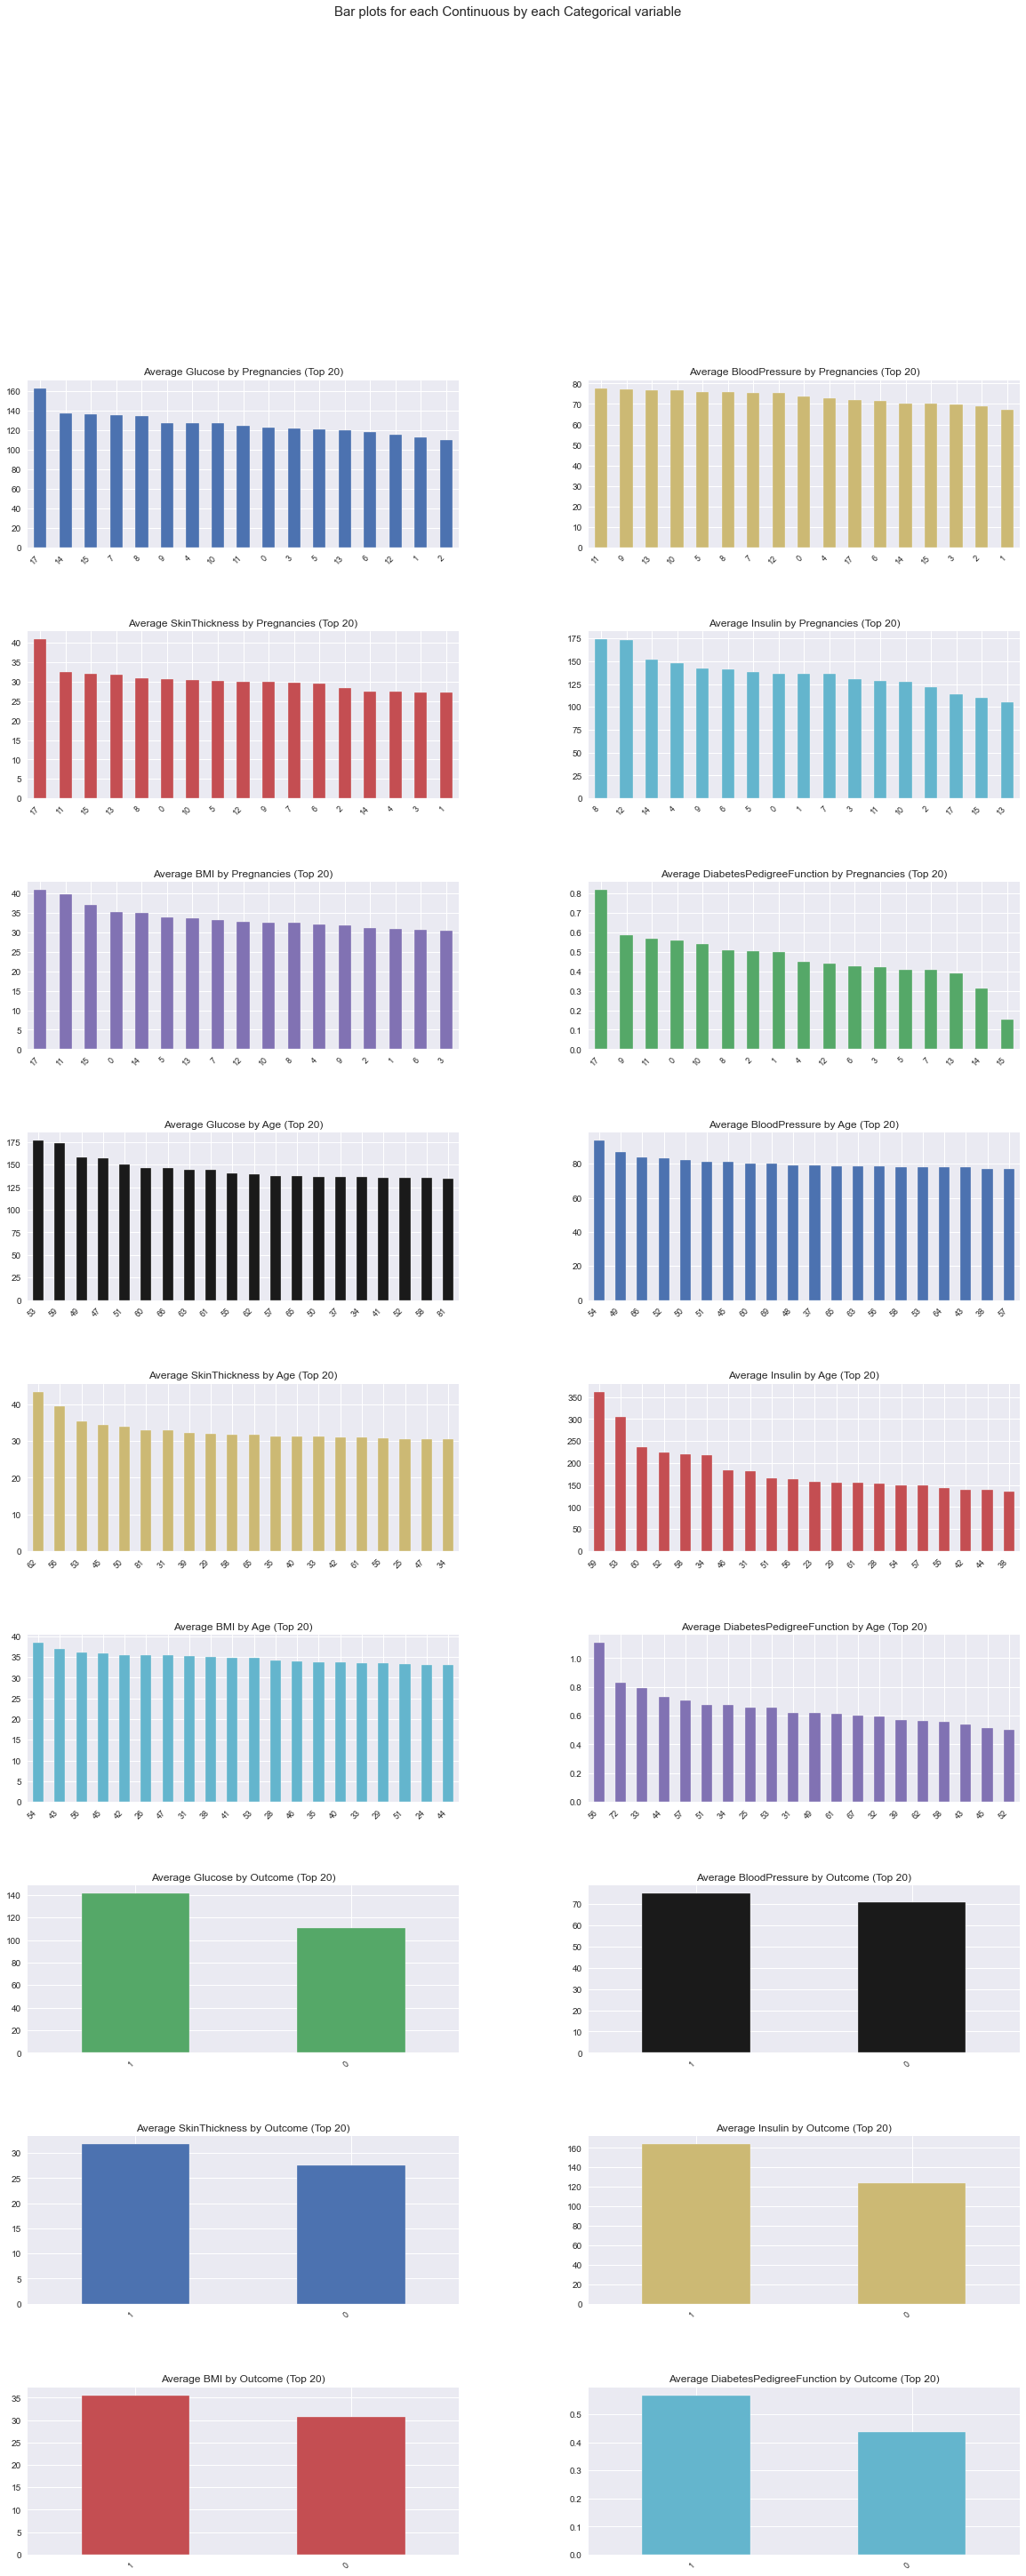

Time to run AutoViz (in seconds) = 9.632

 ###################### VISUALIZATION Completed ########################


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,120.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,120.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,120.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
593,2,82.0,52.0,22.0,115.0,28.5,1.699,25,0
594,6,123.0,72.0,45.0,230.0,33.6,0.733,34,0
595,0,188.0,82.0,14.0,185.0,32.0,0.682,22,1
596,0,67.0,76.0,29.0,120.0,45.3,0.194,46,0


In [7]:
data_preprocessing.data_profile(df,'autoviz')

We can see:

    1. BloodPressure, Age, Pregnancies highly correlated variables with the target variable
    2. BMI is correlated with Pregnancies & Age

#### Scaling

##### **Importance of Scaling**

<font color=black> If there is a vast difference in the range of the input data, machine learning algorithms underlying assumption that higher ranging numbers have superiority of some sort. So these more significant number starts playing a more decisive role while training the model.

In [8]:
# Standard Scaling using feature scaling in dltk
standard_data = data_preprocessing.feature_scaling(df, ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age'],
                       method = 'standardscaler')


#### Feature Selection


In [9]:
# Feature Importance
data_preprocessing.feature_selection(standard_data, method = "feature_importance", task="classification", algorithm="RandomForest", target_variable="Outcome")

,Features,Importance
1,Glucose,0.257128
5,BMI,0.169538
6,DiabetesPedigreeFunction,0.124760
7,Age,0.123328
4,Insulin,0.090671
2,BloodPressure,0.083451
3,SkinThickness,0.076813
0,Pregnancies,0.074311


In [10]:
# Correlation Filter
data_preprocessing.feature_selection(standard_data, method = "high_correlation_filter", correlation_threshold=0.5)


,Feature_1,Feature_2,correlation_coefficient
0,Pregnancies,Age,0.533491
1,SkinThickness,BMI,0.544066


We can see that Pregnancies and SkinThickness variables are having the less important according to the feature importance list and also, from the correlation filter we can see that they are slightly correlated with Age and BMI which are on top of feature importance list. Hence we can remove these 2 variables.

In [11]:
standard_data.drop(['Pregnancies','SkinThickness'], axis=1, inplace=True)
standard_data['Outcome'] = df['Outcome']

# Create a duplicate of target variable with levels, to explore all supported libraries and algorithms
standard_data['Outcome_Category'] = np.where(standard_data['Outcome']==1,"yes","no")

# save training data
standard_data.to_csv('diabetes-train-cleaned.csv',index=False)


In [13]:
# Preprocessing Prediction Dataset
prediction_data = data_preprocessing.read_data('../data/csv/diabetes_test.csv')

# Missing Value Imputation
prediction_median_data = data_preprocessing.impute_missing_value(prediction_data,
                                           ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI'],
                                           imputer="univariate_imputation", 
                                           missing_values=0,
                                           strategy='median')

# Replace the imputed columns in original dataset
for column in list(prediction_median_data):
    prediction_data[column] = prediction_median_data[column]

# Standard Scaling
prediction_standard_data = data_preprocessing.feature_scaling(prediction_data, ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age'],
                       method = 'standardscaler')

# Saving preprocessed prediction set
prediction_standard_data.drop(['Pregnancies','SkinThickness'], axis=1, inplace=True)
prediction_standard_data.to_csv('diabetes-prediction-cleaned.csv',index=False)

#### Initializing DLTK Client

Please check qubitai-dltk documentation on setting up dltk **link**

> <u>Parameters Descriptions</u>
>
> **API key**: `If authentication is enabled`, you need to provide a valid API key
>
> **base_url**: url where kong/base service provided by OpenDLTK is deployed.


In [17]:
api_key = getpass("Valid API key (default=None) : ") or None
base_url = input("Endpoint for openDLTK (default=http://localhost:5000) : ") or "http://localhost:5000"

client = dltk_ai.DltkAiClient(api_key, base_url)

Valid API key (default=None) : ········
Endpoint for openDLTK (default=http://localhost:5000) : https://prod-kong.dltk.ai


<div class="alert alert-block alert-info">
<b>See Also:</b> 

 

1. [How to generate API key](https://docs.dltk.ai/qubitai-dltk/docs/build/html/getting_started/generateAPIkey.html)
2. [OpenDLTK deployment](http://docs.dltk.ai/qubitai-dltk/docs/build/html/getting_started/openDLTK_setup.html)

 

</div>

##### Uploading Training Data

In [18]:
# upload training dataset using store function
train_data_store_response = client.store('diabetes-train-cleaned.csv', Dataset.TRAIN_DATA)
print(train_data_store_response)

# store file url in a variable to use in training.
train_data = train_data_store_response['fileUrl']
print(train_data)

{'id': 755844197296602, 'userId': 6730090969188272963, 'username': None, 'fileUrl': '/YOUR_S3_BUCKET/private/6730090969188272963/Train_Data/1624853180231_diabetes-train-cleaned.csv', 's3Url': None, 'fileSize': 74475, 'fileName': 'diabetes-train-cleaned.csv', 'label': 'Train_Data', 'type': 'FILE', 'isPublic': False, 'cloudfrontUrl': None, 'cloudfrontUrlSigned': None, 's3Key': 'private/6730090969188272963/Train_Data/1624853180231_diabetes-train-cleaned.csv', 'metadata': {'attributes': ['Glucose', 'BloodPressure', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'Outcome_Category']}, 'fileSystem': 'GCP', 'isDefault': False, 'createdAt': '2021-06-28T04:06:20.980+00:00', 'updatedAt': '2021-06-28T04:06:20.980+00:00'}
/YOUR_S3_BUCKET/private/6730090969188272963/Train_Data/1624853180231_diabetes-train-cleaned.csv


##### Uploading Prediction Data

In [19]:
# upload prediction dataset
test_file_store_response = client.store('diabetes-prediction-cleaned.csv', Dataset.TEST_DATA)
print(test_file_store_response)

# store file url in a variable to use while oredicting.
test_data = test_file_store_response['fileUrl']
print(test_data)

{'id': 228195784460132, 'userId': 6730090969188272963, 'username': None, 'fileUrl': '/YOUR_S3_BUCKET/private/6730090969188272963/Test_Data/1624853182448_diabetes-prediction-cleaned.csv', 's3Url': None, 'fileSize': 20424, 'fileName': 'diabetes-prediction-cleaned.csv', 'label': 'Test_Data', 'type': 'FILE', 'isPublic': False, 'cloudfrontUrl': None, 'cloudfrontUrlSigned': None, 's3Key': 'private/6730090969188272963/Test_Data/1624853182448_diabetes-prediction-cleaned.csv', 'metadata': {'attributes': ['Glucose', 'BloodPressure', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']}, 'fileSystem': 'GCP', 'isDefault': False, 'createdAt': '2021-06-28T04:06:22.719+00:00', 'updatedAt': '2021-06-28T04:06:22.719+00:00'}
/YOUR_S3_BUCKET/private/6730090969188272963/Test_Data/1624853182448_diabetes-prediction-cleaned.csv


#### Model Building

Next step after uploading the dataset is to train a model using Train Dataset.
Please check [DLTK ML Classification Document](https://docs.dltk.ai/machine_learning/classification.html) for supported Libraries/framework for training a model.

We will be building 3 models using AdaBoost and XGradientBoosting algorithms along with hyperparameter tuning from scikit to check which is the best performing algorithm for this problem.

**Model 1**

*  **Library :** scikit
*  **Algorithm :** AdaBoost

**Model 2** - Hyperparameters

*  **Library :** scikit
*  **Algorithm :** XGradientBoosting

**Model 3**

*  **Library :** scikit
*  **Algorithm :** XGradientBoosting




<font color=red> Note: 
<font color=black> For scikit, we need to use encoded target variable where as, for h2o and weka, the target variable needs to be given in form of levels (categorical variable).

##### Model 1


In [20]:
# Define the task - Classification/Regression
task = "classification"

# Library to use (scikit, weka, h2o)
library_1 = "scikit"

#algorithm to use
algorithm_1 = "AdaBoost"

# features to be used for training
features = ["Glucose","BloodPressure","Insulin","BMI", "DiabetesPedigreeFunction","Age"]

# Label to predict
label_1 = 'Outcome'
# Train-test split percentage
train_percentage_1 = 50

# Save model 
save_model = "true"

# train function in dltk
train_response_m1 = client.train(task, algorithm_1, train_data, label_1,features,"DiabetesDetection_m1", library_1, train_percentage_1, save_model)
print(train_response_m1)

{'code': 200, 'data': {'jobId': 31371, 'appId': 1612784542341, 'name': 'scikit_classification_train', 'library': 'scikit', 'service': 'Classification', 'task': 'TRAIN', 'state': 'RUN', 'startTime': '2021-06-28T04:06:27.827+00:00', 'endTime': None, 'request': {'library': 'scikit', 'jobType': 'CSV', 'queryId': None, 'modelId': None, 'config': {'name': 'DiabetesDetection_m1', 'algorithm': 'AdaBoost', 'datasetUrl': '/YOUR_S3_BUCKET/private/6730090969188272963/Train_Data/1624853180231_diabetes-train-cleaned.csv', 'label': 'Outcome', 'trainPercentage': 50, 'features': ['Glucose', 'BloodPressure', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'], 'saveModel': 'true', 'params': {}, 'folds': 5, 'crossValidation': False, 'evalPlots': False}}, 'isStreamJob': False, 'jobType': 'CSV', 'queryId': None, 'isJobStopped': None, 'automateJobId': None}}


#####  Model 2

In [21]:
library_2 = "scikit"
algorithm_2 = "XGradientBoosting"
label_2 = "Outcome"

# train percentage
train_percentage_2 = 70

# cross validation
folds = 10
cross_validation = True

# train function in dltk
train_response_m2 = client.train(task, algorithm_2, train_data, label_2,features,"DiabetesDetection_m2", library_2, train_percentage_2, save_model, folds, cross_validation)
print(train_response_m2)

{'code': 200, 'data': {'jobId': 31372, 'appId': 1612784542341, 'name': 'scikit_classification_train', 'library': 'scikit', 'service': 'Classification', 'task': 'TRAIN', 'state': 'RUN', 'startTime': '2021-06-28T04:06:31.141+00:00', 'endTime': None, 'request': {'library': 'scikit', 'jobType': 'CSV', 'queryId': None, 'modelId': None, 'config': {'name': 'DiabetesDetection_m2', 'algorithm': 'XGradientBoosting', 'datasetUrl': '/YOUR_S3_BUCKET/private/6730090969188272963/Train_Data/1624853180231_diabetes-train-cleaned.csv', 'label': 'Outcome', 'trainPercentage': 70, 'features': ['Glucose', 'BloodPressure', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'], 'saveModel': 'true', 'params': {}, 'folds': 10, 'crossValidation': True, 'evalPlots': False}}, 'isStreamJob': False, 'jobType': 'CSV', 'queryId': None, 'isJobStopped': None, 'automateJobId': None}}


#####  Model 3
    
Changing hyperparameters of algorithm used in model 2

In [22]:
train_percentage_3 = 80

# train function in dltk
train_response_m3 = client.train(task, algorithm_2, train_data, label_2,features,"DiabetesDetection_m3", library_2, train_percentage_3, save_model)
print(train_response_m3)

{'code': 200, 'data': {'jobId': 31373, 'appId': 1612784542341, 'name': 'scikit_classification_train', 'library': 'scikit', 'service': 'Classification', 'task': 'TRAIN', 'state': 'RUN', 'startTime': '2021-06-28T04:06:33.441+00:00', 'endTime': None, 'request': {'library': 'scikit', 'jobType': 'CSV', 'queryId': None, 'modelId': None, 'config': {'name': 'DiabetesDetection_m3', 'algorithm': 'XGradientBoosting', 'datasetUrl': '/YOUR_S3_BUCKET/private/6730090969188272963/Train_Data/1624853180231_diabetes-train-cleaned.csv', 'label': 'Outcome', 'trainPercentage': 80, 'features': ['Glucose', 'BloodPressure', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'], 'saveModel': 'true', 'params': {}, 'folds': 5, 'crossValidation': False, 'evalPlots': False}}, 'isStreamJob': False, 'jobType': 'CSV', 'queryId': None, 'isJobStopped': None, 'automateJobId': None}}


##### Checking training status


As training a model might take lot of time depending on size of dataset, we can check current status of model training using below functions

In [23]:
train_job_status_response_m1 = client.job_status(train_response_m1['data']['jobId'])
print(train_job_status_response_m1)
print(json.dumps(train_job_status_response_m1, indent=2))

{'jobId': 31371, 'appId': 1612784542341, 'name': 'scikit_classification_train', 'library': 'scikit', 'service': 'Classification', 'task': 'TRAIN', 'state': 'FINISH', 'startTime': '2021-06-28T04:06:27.827+00:00', 'endTime': None, 'isStreamJob': False, 'jobType': 'CSV', 'queryId': None, 'isJobStopped': None, 'automateJobId': None}
{
  "jobId": 31371,
  "appId": 1612784542341,
  "name": "scikit_classification_train",
  "library": "scikit",
  "service": "Classification",
  "task": "TRAIN",
  "state": "FINISH",
  "startTime": "2021-06-28T04:06:27.827+00:00",
  "endTime": null,
  "isStreamJob": false,
  "jobType": "CSV",
  "queryId": null,
  "isJobStopped": null,
  "automateJobId": null
}


In [24]:
train_job_status_response_m2 = client.job_status(train_response_m2['data']['jobId'])
print(train_job_status_response_m2)
print(json.dumps(train_job_status_response_m2, indent=2))

{'jobId': 31372, 'appId': 1612784542341, 'name': 'scikit_classification_train', 'library': 'scikit', 'service': 'Classification', 'task': 'TRAIN', 'state': 'FINISH', 'startTime': '2021-06-28T04:06:31.141+00:00', 'endTime': None, 'isStreamJob': False, 'jobType': 'CSV', 'queryId': None, 'isJobStopped': None, 'automateJobId': None}
{
  "jobId": 31372,
  "appId": 1612784542341,
  "name": "scikit_classification_train",
  "library": "scikit",
  "service": "Classification",
  "task": "TRAIN",
  "state": "FINISH",
  "startTime": "2021-06-28T04:06:31.141+00:00",
  "endTime": null,
  "isStreamJob": false,
  "jobType": "CSV",
  "queryId": null,
  "isJobStopped": null,
  "automateJobId": null
}


In [25]:
train_job_status_response_m3 = client.job_status(train_response_m3['data']['jobId'])
print(train_job_status_response_m3)
print(json.dumps(train_job_status_response_m3, indent=2))

{'jobId': 31373, 'appId': 1612784542341, 'name': 'scikit_classification_train', 'library': 'scikit', 'service': 'Classification', 'task': 'TRAIN', 'state': 'FINISH', 'startTime': '2021-06-28T04:06:33.441+00:00', 'endTime': None, 'isStreamJob': False, 'jobType': 'CSV', 'queryId': None, 'isJobStopped': None, 'automateJobId': None}
{
  "jobId": 31373,
  "appId": 1612784542341,
  "name": "scikit_classification_train",
  "library": "scikit",
  "service": "Classification",
  "task": "TRAIN",
  "state": "FINISH",
  "startTime": "2021-06-28T04:06:33.441+00:00",
  "endTime": null,
  "isStreamJob": false,
  "jobType": "CSV",
  "queryId": null,
  "isJobStopped": null,
  "automateJobId": null
}


####  Model Evaluation

<font color=red>**Note :**</font> Proceed further only after state is **'FINISH'**
    
##### Model Training Job Output 

##### **Model Evaluation in DLTK**

<font color=black> During the training process, based on the train percentage input, the data is divided into train and test sets. Train set is used for model building and test set is used to evaluate the model. The metrics displayed in the Job Output function consists metrics of both train and test sets.

Once model training job is finished, we can look into the model evaluation metrics such as 
- Accuracy
- confusionMatrix

& also get **modelUrl**, which will be required for prediction step

In [26]:
# Evaluation metrics - model 1
train_job_output_response_m1 = client.job_output(train_response_m1['data']['jobId'])
train_job_output_response_m1

{'id': 30645,
 'jobId': 31371,
 'output': {'eval': {'kappa': None,
   'recall': 0.5979381443298969,
   'correct': 219,
   'entropy': 0.9091178440709682,
   'ksScore': 0.3949678473001939,
   'accuracy': 73.24,
   'rocCurve': {'values': [[0.0, 0.0],
     [0.0049504950495049506, 0.0],
     [0.009900990099009901, 0.0],
     [0.01485148514851485, 0.0],
     [0.019801980198019802, 0.0],
     [0.024752475247524754, 0.0],
     [0.0297029702970297, 0.0],
     [0.034653465346534656, 0.0],
     [0.039603960396039604, 0.0],
     [0.04455445544554455, 0.0],
     [0.04950495049504951, 0.0],
     [0.054455445544554455, 0.0],
     [0.0594059405940594, 0.0],
     [0.06435643564356436, 0.0],
     [0.06930693069306931, 0.0],
     [0.07425742574257425, 0.0],
     [0.07920792079207921, 0.0],
     [0.07920792079207921, 0.010309278350515464],
     [0.07920792079207921, 0.020618556701030927],
     [0.08415841584158416, 0.020618556701030927],
     [0.0891089108910891, 0.020618556701030927],
     [0.09405940594

In [27]:
# Evaluation metrics - model 2
train_job_output_response_m2 = client.job_output(train_response_m2['data']['jobId'])
train_job_output_response_m2

{'id': 30646,
 'jobId': 31372,
 'output': {'eval': {'f1': {'std': 0.07862562210678554,
    'average': 0.6349602828545005},
   'recall': {'std': 0.09264199740150081, 'average': 0.628095238095238},
   'roc_auc': {'std': 0.05903476114064569, 'average': 0.7940786019536019},
   'accuracy': {'std': 0.05326290475748897, 'average': 0.7509039548022598},
   'precision': {'std': 0.08679118473494717, 'average': 0.6498873415811092}},
  'modelUrl': '/YOUR_S3_BUCKET/private/6730090969188272963/model/1624853192484_modelfile',
  'evalTrain': {'f1': {'std': 0.0, 'average': 1.0},
   'recall': {'std': 0.0, 'average': 1.0},
   'roc_auc': {'std': 0.0, 'average': 1.0},
   'accuracy': {'std': 0.0, 'average': 1.0},
   'precision': {'std': 0.0, 'average': 1.0},
   'pearsonCorrelation': {'Age': 0.20967827985369658,
    'BMI': 0.32793374059906133,
    'Glucose': 0.47922547284856526,
    'Insulin': 0.21314284770607567,
    'BloodPressure': 0.16861868298029678,
    'DiabetesPedigreeFunction': 0.1847344183215459}}}}

In [28]:
# Evaluation metrics - model 3
train_job_output_response_m3 = client.job_output(train_response_m3['data']['jobId'])
train_job_output_response_m3

{'id': 30647,
 'jobId': 31373,
 'output': {'eval': {'kappa': None,
   'recall': 0.6216216216216216,
   'correct': 88,
   'entropy': 0.8912402011913028,
   'ksScore': 0.4047541517421035,
   'accuracy': 73.33,
   'rocCurve': {'values': [[0.0, 0.0],
     [0.012048192771084338, 0.0],
     [0.024096385542168676, 0.0],
     [0.03614457831325301, 0.0],
     [0.04819277108433735, 0.0],
     [0.060240963855421686, 0.0],
     [0.07228915662650602, 0.0],
     [0.07228915662650602, 0.02702702702702703],
     [0.08433734939759036, 0.02702702702702703],
     [0.0963855421686747, 0.02702702702702703],
     [0.10843373493975904, 0.02702702702702703],
     [0.12048192771084337, 0.02702702702702703],
     [0.13253012048192772, 0.02702702702702703],
     [0.14457831325301204, 0.02702702702702703],
     [0.1566265060240964, 0.02702702702702703],
     [0.1686746987951807, 0.02702702702702703],
     [0.18072289156626506, 0.02702702702702703],
     [0.1927710843373494, 0.02702702702702703],
     [0.204819277

#### Model Comparison


##### Confusion Matrix </font>

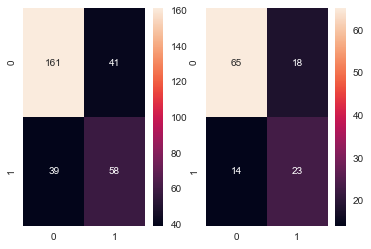

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

confusion_matrix_list_m1 = train_job_output_response_m1['output']['eval']['confusionMatrix']
confusion_matrix_list_m3 = train_job_output_response_m3['output']['eval']['confusionMatrix']


fig, ax =plt.subplots(1,2)

sns.heatmap(confusion_matrix_list_m1, annot=True, ax=ax[0],label="model_1",fmt='g')
sns.heatmap(confusion_matrix_list_m3, annot=True, ax=ax[1],label="model_3",fmt='g')


fig.show()

Although the accuracy is almost same for both the models, we can see that XGradientBoosting's recall and precision are slightly higher than AdaBoost.

##### Roc Curve </font>

<AxesSubplot:xlabel='fpr', ylabel='tpr'>

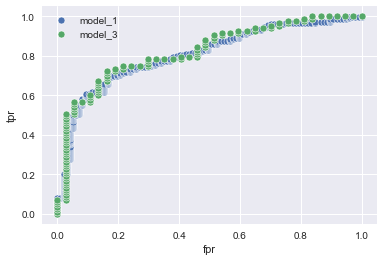

In [30]:
# ROC Curve

# Model 1 - RoC Curve
roc_values_list_m1 = train_job_output_response_m1['output']['eval']['rocCurve']['values']

roc_df_m1 = pd.DataFrame(roc_values_list_m1,columns=['tpr','fpr'])
sns.scatterplot(data=roc_df_m1, x=roc_df_m1['fpr'], y=roc_df_m1['tpr'], label='model_1')

# Model 3 - RoC Curve

roc_values_list_m3 = train_job_output_response_m3['output']['eval']['rocCurve']['values']

roc_df_m3 = pd.DataFrame(roc_values_list_m3,columns=['tpr','fpr'])
sns.scatterplot(data=roc_df_m3, x=roc_df_m3['fpr'], y=roc_df_m3['tpr'], label='model_3')

Comparing the accuracy and recall of the 3 models, we can see that, model 3 is performing better. From the RoC curve, we can see that model 3 is performing slilghtly better than model 1

#### Model Prediction

In [31]:
# load the model built
model = train_job_output_response_m3['output']['modelUrl']

In [32]:
# Predict using created ML Model
predict_response = client.predict(task, test_data, model,features = ["Glucose","BloodPressure","Insulin","BMI", "DiabetesPedigreeFunction","Age"],lib=library_2)
predict_response

{'code': 200,
 'data': {'jobId': 31374,
  'appId': 1612784542341,
  'name': 'scikit_classification_predict',
  'library': 'scikit',
  'service': 'Classification',
  'task': 'PREDICT',
  'state': 'RUN',
  'startTime': '2021-06-28T04:07:27.545+00:00',
  'endTime': None,
  'request': {'library': 'scikit',
   'jobType': 'CSV',
   'queryId': None,
   'modelId': None,
   'config': {'datasetUrl': '/YOUR_S3_BUCKET/private/6730090969188272963/Test_Data/1624853182448_diabetes-prediction-cleaned.csv',
    'modelUrl': '/YOUR_S3_BUCKET/private/6730090969188272963/model/1624853193834_modelfile',
    'params': {},
    'features': ['Glucose',
     'BloodPressure',
     'Insulin',
     'BMI',
     'DiabetesPedigreeFunction',
     'Age']}},
  'isStreamJob': False,
  'jobType': 'CSV',
  'queryId': None,
  'isJobStopped': None,
  'automateJobId': None}}

In [33]:
# check job status of prediction
predict_job_status_response = client.job_status(predict_response['data']['jobId'])
predict_job_status_response

{'jobId': 31374,
 'appId': 1612784542341,
 'name': 'scikit_classification_predict',
 'library': 'scikit',
 'service': 'Classification',
 'task': 'PREDICT',
 'state': 'FINISH',
 'startTime': '2021-06-28T04:07:27.545+00:00',
 'endTime': None,
 'isStreamJob': False,
 'jobType': 'CSV',
 'queryId': None,
 'isJobStopped': None,
 'automateJobId': None}

In [34]:
# use job output function to get the predictions file
predict_job_output_response = client.job_output(predict_response['data']['jobId'])
predict_job_output_response

{'id': 30648,
 'jobId': 31374,
 'output': {'predFileUrl': '/YOUR_S3_BUCKET/private/6730090969188272963/prediction/1624853248291_prediction.csv'}}

#### Download Predictions

In [35]:
# download the predictions file using download function
pred_file = predict_job_output_response['output']['predFileUrl']
response = client.download(pred_file)

Executing shutdown due to inactivity...


2021-06-28 10:27:33,621 - INFO     - Executing shutdown due to inactivity...


Executing shutdown...


2021-06-28 10:27:42,108 - INFO     - Executing shutdown...


#### Reference

For more detail on using ML Classification please refer [DLTK ML Classification Documentation](https://docs.dltk.ai/machine_learning/classification.html)

:
<center><b>For More Details about DLTK</b></center>

|[<img src="https://pbs.twimg.com/profile_images/909757546063323137/-RIWgodF.jpg" width=50 title="Pypi Logo"/>](https://pypi.org/project/qubitai-dltk/) |[<img src="https://cdn.iconscout.com/icon/free/png-512/documentation-1502741-1272951.png" width=50 title="Documentation"/>](https://docs.dltk.ai) | [<img src="https://cdn4.iconfinder.com/data/icons/iconsimple-logotypes/512/github-512.png" width=50 title="Documentation"/>](https://docs.dltk.ai)| 
|:-------------:|:-------:|:--------:|
|pypi|Documentation|Github|